In [1]:
# !pip install numpy
# !pip install tensorflow
# !pip install pandas

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

x_test = np.load('/home/jovyan/X-IIoTID/x_test.npy')
x_train = np.load('/home/jovyan/X-IIoTID/x_train.npy')
x_val = np.load('/home/jovyan/X-IIoTID/x_val.npy')
y_test = np.load('/home/jovyan/X-IIoTID/y_test.npy')
y_train = np.load('/home/jovyan/X-IIoTID/y_train.npy')
y_val = np.load('/home/jovyan/X-IIoTID/y_val.npy')

2024-03-05 21:52:02.690000: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 21:52:02.718722: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 21:52:02.718756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 21:52:02.719427: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 21:52:02.723824: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 21:52:02.724416: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Dense(50, input_shape=input_shape, activation='relu'))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(learning_rate=0.01)

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = dnn_model.fit(x_train, y_train, epochs=50, batch_size=64,
                     validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

from joblib import dump, load
dump(hist, "/home/jovyan/X-IIoTID/pre_train/DNN.joblib")


2024-03-05 21:52:14.779920: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
7012/7012 [==============================] - 7s 894us/step - loss: 0.6142 - accuracy: 0.8337 - val_loss: 0.3631 - val_accuracy: 0.8971
Epoch 2/50
7012/7012 [==============================] - 6s 918us/step - loss: 0.3010 - accuracy: 0.9136 - val_loss: 0.2581 - val_accuracy: 0.9202
Epoch 3/50
7012/7012 [==============================] - 6s 927us/step - loss: 0.2109 - accuracy: 0.9345 - val_loss: 0.1950 - val_accuracy: 0.9385
Epoch 4/50
7012/7012 [==============================] - 6s 905us/step - loss: 0.1716 - accuracy: 0.9481 - val_loss: 0.1878 - val_accuracy: 0.9440
Epoch 5/50
7012/7012 [==============================] - 6s 899us/step - loss: 0.1542 - accuracy: 0.9528 - val_loss: 0.1848 - val_accuracy: 0.9488
Epoch 6/50
7012/7012 [==============================] - 6s 906us/step - loss: 0.1439 - accuracy: 0.9565 - val_loss: 0.1343 - val_accuracy: 0.9592
Epoch 7/50
7012/7012 [==============================] - 6s 907us/step - loss: 0.1363 - accuracy: 0.9589 - val_loss: 0.1269 -

['/home/jovyan/X-IIoTID/pre_train/DNN.joblib']

/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4383/4383 [==============================] - 2s 473us/step
FPR: [5.73254250e-04 1.79006158e-04 9.29826695e-05 4.42220240e-05
 5.15452531e-05 0.00000000e+00 1.72395216e-04 8.38353149e-03
 4.63000390e-04 0.00000000e+00 4.31533598e-05 4.74648675e-02
 1.12176791e-04 2.14244396e-05 1.91924246e-03 1.07290765e-04
 7.13577234e-05 7.14280612e-06 5.09895617e-05]
TPR: [0.99021068 0.55789474 0.80668258 0.56471105 0.99864468 0.
 0.91724138 0.99538806 0.99327085 0.         0.99496222 0.99855981
 0.99766643 0.68965517 0.80230903 0.65957447 0.91208791 0.00436681
 1.        ]
FNR: [0.00978932 0.44210526 0.19331742 0.43528895 0.00135532 1.
 0.08275862 0.00461194 0.00672915 1.         0.00503778 0.00144019
 0.00233357 0.31034483 0.19769097 0.34042553 0.08791209 0.99563319
 0.        ]
TNR: [0.99942675 0.99982099 0.99990702 0.99995578 0.99994845 1.
 0.9998276  0.99161647 0.999537   1.         0.99995685 0.95253513
 0.99988782 0.99997858 0.99808076 0.99989271 0.99992864 0.99999286
 0.99994901]
Accuracy: 0.

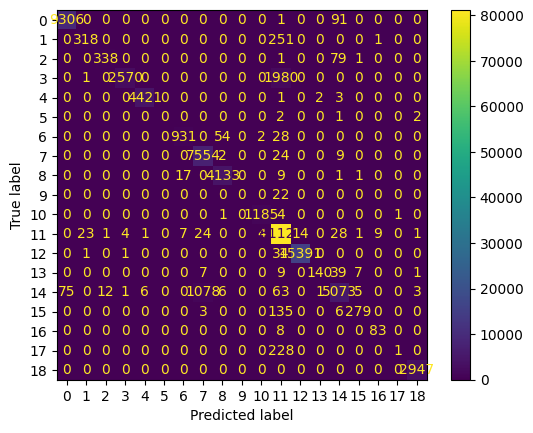

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score


test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
accuracy = accuracy_score(y_test, y_hat)
precision_macro = precision_score(y_test, y_hat, average='macro')
precision_micro = precision_score(y_test, y_hat, average='micro')
precision_weighted = precision_score(y_test, y_hat, average='weighted')

f1_weighted = f1_score(y_test, y_hat, average='weighted')
f1_macro = f1_score(y_test, y_hat, average='macro')
f1_micro = f1_score(y_test, y_hat, average='micro')


auc = roc_auc_score(y_test, dnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Accuracy: {accuracy}")
print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

import pandas as pd
metrics = {
    "model" : "dnn",
    "attack_model" : "none",
    "Accuracy": accuracy,
    "Precision-micro": precision_micro,
    "Precision-macro": precision_macro,
    "Precision-weighted": precision_weighted,
    "F1-micro": f1_micro,
    "F1-macro": f1_macro,
    "F1-weighted": f1_weighted,
    "FPR": np.mean(fpr),
    "TPR": np.mean(tpr),
    "FNR": np.mean(fnr),
    "TNR": np.mean(tnr),
    "AUC": auc
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/X-IIoTID/model.csv", mode='a', index=False)